In [3]:
using Plots

## 1.5 Secant method

In [12]:
f(x) = x^3 -15*x + 12

f (generic function with 1 method)

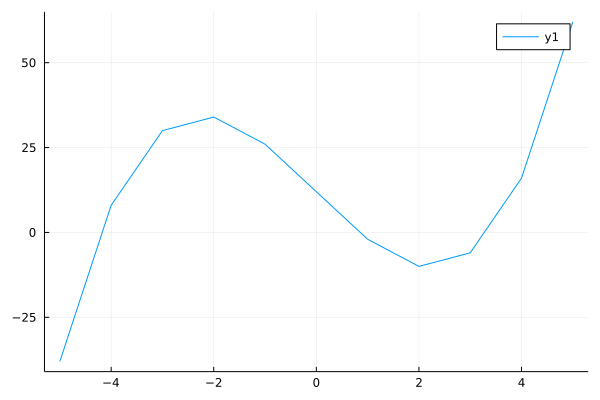

In [18]:
plot(f, -5:5)

In [2]:
function find_x_intercept(f, x1, x2, iterations=3)
    x_intercept = 0
    while iterations != 0
        iterations -= 1
        println("x1: $(x1), x2: $(x2)")
        y1, y2 = f(x1), f(x2)

        # line equation: y = k*x + b
        k = (y1-y2) / (x1-x2)
        b = y1 - k*x1

        println("secant function: y = $(k)*x + $(b)")
        # find x-intercept, with 0 = kx + b
        x_intercept = -b / k
        println("x intercept = $(x_intercept), iterations left: $(iterations)")
        
        if k > 0
            x1, x2 = x1, x_intercept
        else
            x1, x2 = x_intercept, x2
        end

    end
    return x_intercept
end

find_x_intercept(f, 3,4)

x1: 3, x2: 4
secant function: y = 22.0*x + -72.0
x intercept = 3.272727272727273, iterations left: 2
x1: 3, x2: 3.272727272727273
secant function: y = 14.528925619834714*x + -49.58677685950414
x intercept = 3.41296928327645, iterations left: 1
x1: 3, x2: 3.41296928327645
secant function: y = 15.887267178417936*x + -53.66180153525381
x intercept = 3.3776609238466575, iterations left: 0


3.3776609238466575

## Bisection method

Desctiption taken from [here](https://www.math.hkust.edu.hk/~machas/numerical-methods-for-engineers.pdf), from [this](https://www.coursera.org/learn/numerical-methods-engineers/lecture/8f5iB/bisection-method-lecture-13) coursera course 

In [31]:
function bisection(f, x0, x1, iterations=3)
    best_root_approximation = -1
    while iterations > 0        
        iterations -= 1
        y0, y1 = f(x0), f(x1)
        if y0 * y1 > 0
            prinln("Positive sign means wrong initial guess with x0=$(x0) and x1=$(x1)!")
            return -1
        end
        best_root_approximation = x_next = (x0 + x1) / 2
        println("Next x = $(x_next)")

        # choose a new pair, that "brackets" the root
        y_next = f(x_next)
        if y0 * y_next > 0
            x0 = x_next
            x1 = x1
        else
            x0 = x0
            x1 = x_next
        end
    end
    return best_root_approximation
end

f(x) = x^2 - 2
root = bisection(f, 1, 2, 13)
println("SQRT(2) with bisection method: $(root), real: $(sqrt(2))")

Next x = 1.5
Next x = 1.25
Next x = 1.375
Next x = 1.4375
Next x = 1.40625
Next x = 1.421875
Next x = 1.4140625
Next x = 1.41796875
Next x = 1.416015625
Next x = 1.4150390625
Next x = 1.41455078125
Next x = 1.414306640625
Next x = 1.4141845703125
SQRT(2) with bisection method: 1.4141845703125, real: 1.4142135623730951


In [33]:
f(x) = x^2 - 3
root = bisection(f, 1, 2, 13)
println("SQRT(2) with bisection method: $(root), real: $(sqrt(3))")

Next x = 1.5
Next x = 1.75
Next x = 1.625
Next x = 1.6875
Next x = 1.71875
Next x = 1.734375
Next x = 1.7265625
Next x = 1.73046875
Next x = 1.732421875
Next x = 1.7314453125
Next x = 1.73193359375
Next x = 1.732177734375
Next x = 1.7320556640625
SQRT(2) with bisection method: 1.7320556640625, real: 1.7320508075688772


## 1.6 Introduction to the Julia Language

In [1]:
4//3

4//3

In [4]:
rad2deg(pi/2)

90.0

In [ ]:
pi

In [6]:
g(x,y) = x + y
g(2,5)

7

In [7]:
x = g(2,2)

4

In [8]:
x

4

In [9]:
a2 = [1:5]

1-element Vector{UnitRange{Int64}}:
 1:5

In [14]:
typeof(1:5)

UnitRange{Int64}